In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
df=pd.read_csv("ThoracicSurgery.csv")

In [3]:
df.head()


,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [5]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [6]:
df.shape

(454, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [8]:
df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [9]:
live  = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
   
l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': 1, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')


print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,1,3.195072
FEV1,1,2.383188
Performance,1,0.913043
Pain,1,0.101449
Haemoptysis,1,0.202899
Dyspnoea,1,0.115942
Cough,1,0.797101
Weakness,1,0.246377
Tumor_Size,1,2.014493


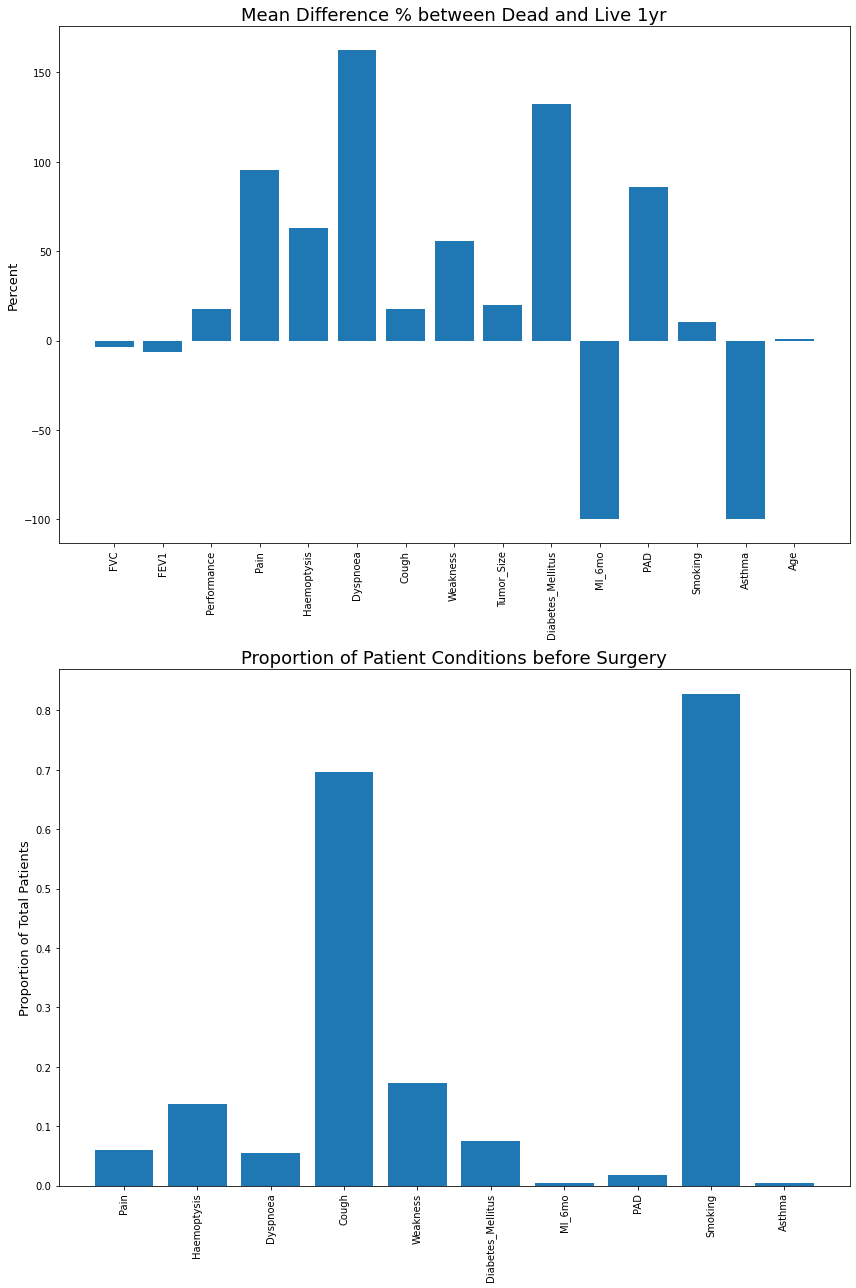

In [10]:
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()

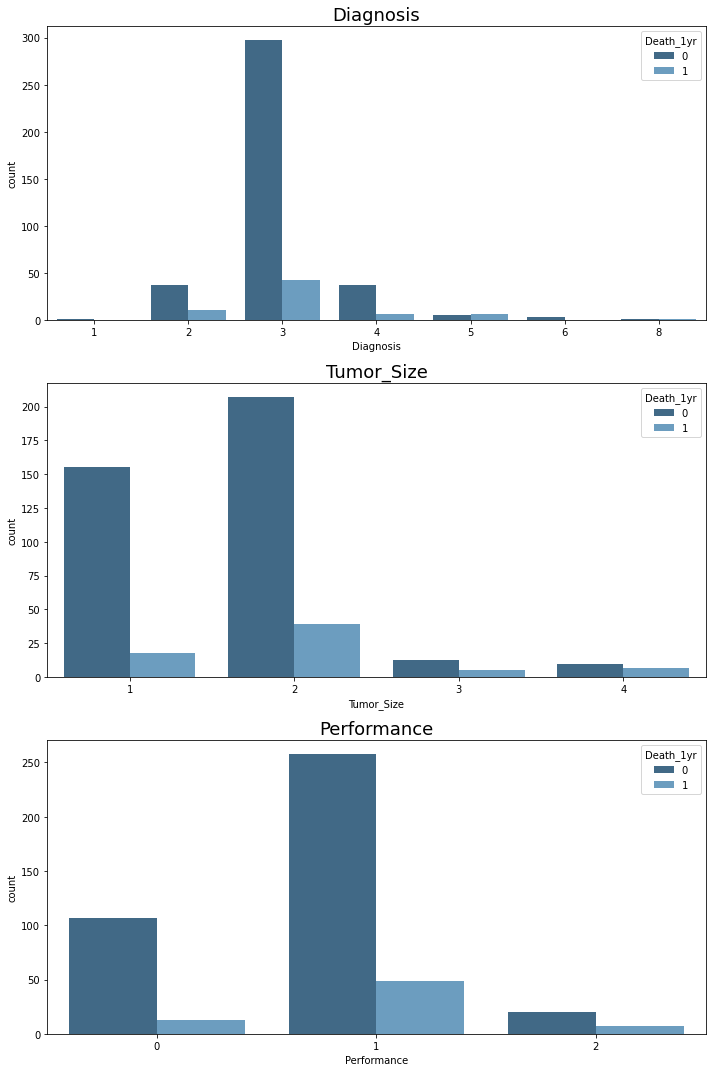

In [11]:
fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [13]:
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1666), ('FEV1', 0.0573), ('Performance', 0.0282), ('Pain', 0.0969), ('Haemoptysis', 0.0637), ('Dyspnoea', 0.0256), ('Cough', 0.0308), ('Weakness', 0.0581), ('Tumor_Size', 0.0005), ('Diabetes_Mellitus', 0.0205), ('MI_6mo', 0.7177), ('PAD', 0.3418), ('Smoking', 0.062), ('Asthma', 0.716), ('Age', 0.2819)]


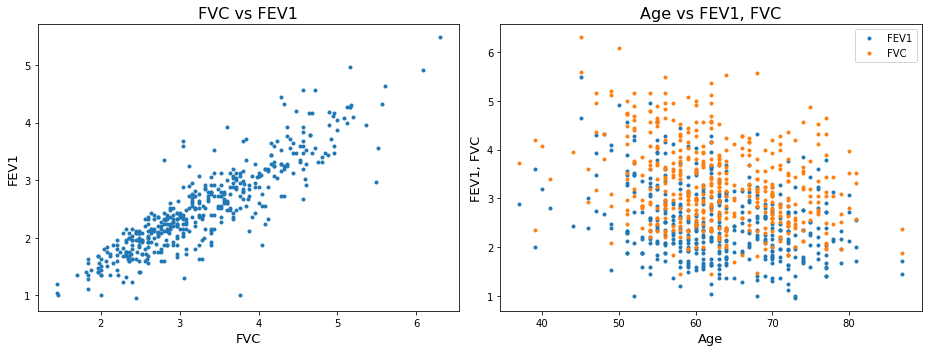

In [14]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [15]:
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.8875452733829001

In [16]:
np.corrcoef(df.Age, df.FVC)[0,1]

-0.2994299196604911

In [17]:
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798917

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

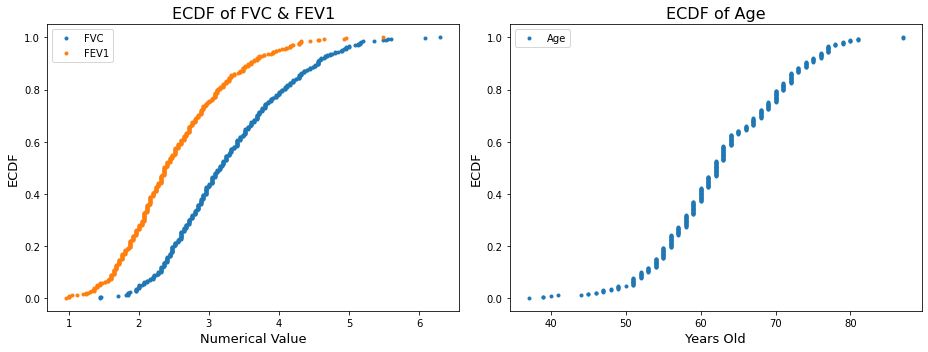

In [19]:
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)

plt.tight_layout()

In [20]:
df.drop(['FVC'],axis=1, inplace=True)

In [21]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15:16].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (363, 15)
Shape of y_train (363, 1)
Shape of x_test (91, 15)
Shape of y_test (91, 1)


In [24]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train.ravel())
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [25]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train.ravel())
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [26]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train.ravel())
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [27]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train.ravel())
    yPred = xg.predict(x_test)
    print('***GrandientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [28]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [29]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[62 12]
 [13  4]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        74
           1       0.25      0.24      0.24        17

    accuracy                           0.73        91
   macro avg       0.54      0.54      0.54        91
weighted avg       0.72      0.73      0.72        91

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[73  1]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        74
           1       0.00      0.00      0.00        17

    accuracy                           0.80        91
   macro avg       0.41      0.49      0.45        91
weighted avg       0.66      0.80      0.72        91

-----------------------------------------------------------------------

C:\Users\Mohansai\Documents\Zoom\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier()
rf.fit(x_train,y_train.ravel())
yPred = rf.predict(x_test)

In [31]:
f1_score(yPred,y_test,average='weighted')

0.8476461809795143

In [32]:
cv = cross_val_score(rf,x,y.ravel(),cv=5)

In [33]:
np.mean(cv)

0.8414163614163614

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
yPred_dt = dt.predict(x_test)

In [35]:
f1_score(yPred_dt,y_test,average='weighted')

0.7358388247087242

In [36]:
cv = cross_val_score(rf,x,y.ravel(),cv=5)

In [37]:
np.mean(cv)

0.8414163614163614

In [38]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train.ravel())
yPred_kn = kn.predict(x_test)

In [39]:
f1_score(yPred_kn,y_test,average='weighted')

0.896969696969697

In [40]:
cv = cross_val_score(kn,x,y.ravel(),cv=5)

In [41]:
np.mean(cv)

0.8326495726495727

In [42]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train.ravel())
yPred_gb = gb.predict(x_test)

In [43]:
f1_score(yPred_gb,y_test,average='weighted')

0.8313425704730053

In [44]:
cv = cross_val_score(gb,x,y.ravel(),cv=5)

In [45]:
np.mean(cv)

0.8260073260073261

In [46]:
x_test[4]

array([ 3. ,  3.2,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  2. ,  0. ,  0. ,
        0. ,  1. ,  0. , 55. ])

In [47]:
gb.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([0], dtype=int64)

In [48]:
rf.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([0], dtype=int64)

In [49]:
dt.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([0], dtype=int64)

In [50]:
kn.predict([[3,4.08,0,0,0,0 ,1 ,0,2,0,0,0,1,0,55]])

array([0], dtype=int64)

In [51]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))